In [1]:
import warnings
warnings.filterwarnings('ignore')
from collections import Counter

# Import necessary packages
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Exploratory Data Analysis (EDA)

In [2]:
# Load Dataset mushroom.csv
df=pd.read_csv("mushroom.csv")

In [3]:
df.shape

(2000, 26)

In [4]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2000 non-null   int64  
 1   cap_shape                 2000 non-null   str    
 2   cap_surface               2000 non-null   str    
 3   cap_color                 2000 non-null   str    
 4   bruises                   2000 non-null   str    
 5   odor                      2000 non-null   str    
 6   gill_attachment           2000 non-null   str    
 7   gill_spacing              2000 non-null   str    
 8   gill_size                 2000 non-null   str    
 9   gill_color                2000 non-null   str    
 10  stalk_shape               2000 non-null   str    
 11  stalk_root                2000 non-null   str    
 12  stalk_surface_above_ring  2000 non-null   str    
 13  stalk_surface_below_ring  2000 non-null   str    
 14  stalk_color_above_r

In [5]:
df.isnull().sum()

Unnamed: 0                  0
cap_shape                   0
cap_surface                 0
cap_color                   0
bruises                     0
odor                        0
gill_attachment             0
gill_spacing                0
gill_size                   0
gill_color                  0
stalk_shape                 0
stalk_root                  0
stalk_surface_above_ring    0
stalk_surface_below_ring    0
stalk_color_above_ring      0
stalk_color_below_ring      0
veil_type                   0
veil_color                  0
ring_number                 0
ring_type                   0
spore_print_color           0
population                  0
habitat                     0
class                       0
stalk_height                0
cap_diameter                0
dtype: int64

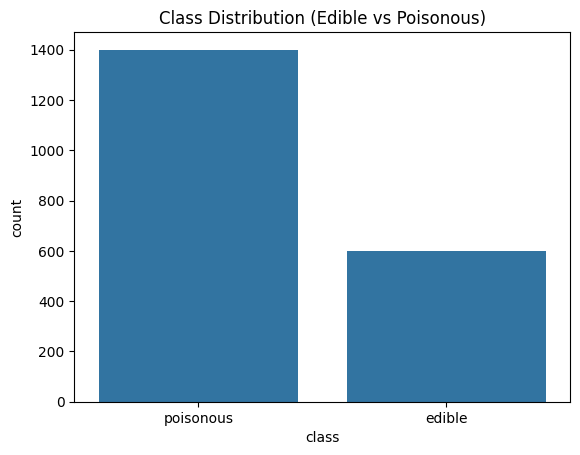

In [6]:
sns.countplot(x="class", data=df)
plt.title("Class Distribution (Edible vs Poisonous)")
plt.show()

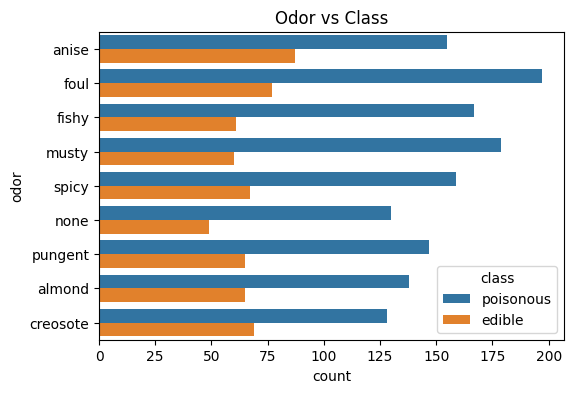

In [7]:
plt.figure(figsize=(6,4))
sns.countplot(y="odor", hue="class", data=df)
plt.title("Odor vs Class")
plt.show() # categorical data plot

#Data Preprocessing

In [8]:
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder

In [9]:
if "Unnamed: 0" in df.columns:
    df.drop("Unnamed: 0", axis=1, inplace=True)
# Target and Features
X = df.drop("class", axis=1)
y = df["class"]


In [10]:
# Encode target
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [11]:
# OneHotEncode X
X_encoded = pd.get_dummies(X)
X_encoded

,stalk_height,cap_diameter,cap_shape_bell,cap_shape_conical,cap_shape_convex,cap_shape_flat,cap_shape_sunken,cap_surface_fibrous,cap_surface_grooves,cap_surface_scaly,...,population_scattered,population_several,population_solitary,habitat_grasses,habitat_leaves,habitat_meadows,habitat_paths,habitat_urban,habitat_waste,habitat_woods
0,14.276173,5.054983,False,False,False,False,True,False,False,True,...,False,False,False,False,False,False,False,False,True,False
1,3.952715,19.068319,False,False,False,False,True,True,False,False,...,False,False,False,False,False,False,False,False,True,False
2,9.054265,7.205884,False,False,False,True,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
3,5.226499,20.932692,True,False,False,False,False,False,False,True,...,False,False,False,True,False,False,False,False,False,False
4,14.037532,12.545245,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,5.877891,17.464145,False,False,False,False,True,False,False,True,...,False,False,False,False,True,False,False,False,False,False
1996,6.500840,13.501957,False,False,False,False,True,False,False,True,...,False,False,False,False,False,False,False,False,True,False
1997,13.558064,11.270020,False,False,True,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True
1998,11.092703,8.423199,True,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True


In [12]:
# Convert boolean True/False to 1/0
X_encoded_num = X_encoded.astype(float)

# Check the result
X_encoded_num.head()

,stalk_height,cap_diameter,cap_shape_bell,cap_shape_conical,cap_shape_convex,cap_shape_flat,cap_shape_sunken,cap_surface_fibrous,cap_surface_grooves,cap_surface_scaly,...,population_scattered,population_several,population_solitary,habitat_grasses,habitat_leaves,habitat_meadows,habitat_paths,habitat_urban,habitat_waste,habitat_woods
0,14.276173,5.054983,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,3.952715,19.068319,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,9.054265,7.205884,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,5.226499,20.932692,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,14.037532,12.545245,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [13]:
# Assuming y is a pandas Series
y_encoded = y.map({'poisonous': 0, 'edible': 1})

# Check the result
y_encoded.head()

0    0
1    1
2    0
3    0
4    0
Name: class, dtype: int64

In [14]:
# Apply chi-square
chi_scores, p_values = chi2(X_encoded, y_encoded)

chi_df = pd.DataFrame({
    "Feature": X_encoded.columns,
    "Chi_Score": chi_scores,
    "p_value": p_values
}).sort_values(by="Chi_Score", ascending=False)

print("Top Important Features:")
print(chi_df.head(20))

print("\nLeast Important Features:")
print(chi_df.tail(20))

Top Important Features:
                          Feature  Chi_Score   p_value
17                  cap_color_red  20.106702  0.000007
46              gill_color_orange  12.487654  0.000410
81    stalk_color_below_ring_gray  10.500000  0.001194
105       spore_print_color_brown   7.100840  0.007705
91               veil_color_white   6.702919  0.009626
14                cap_color_green   6.617072  0.010101
9               cap_surface_scaly   5.931925  0.014869
114          population_clustered   5.602241  0.017938
123                 habitat_urban   5.555154  0.018426
97           ring_type_evanescent   5.516717  0.018836
118           population_solitary   5.510040  0.018908
48              gill_color_purple   5.472337  0.019320
69   stalk_color_above_ring_brown   5.259005  0.021833
7             cap_surface_fibrous   5.046038  0.024682
125                 habitat_woods   4.943503  0.026189
115           population_numerous   4.829869  0.027971
59         stalk_root_rhizomorphs   4.598

In [15]:
# Keep only significant features (p < 0.05)
selected_features = chi_df[chi_df["p_value"] < 0.05]["Feature"].tolist()

X_selected = X_encoded[selected_features]

print("\nTotal Original Features After OneHotEncoding:", X_encoded.shape[1])
print("Total Selected Important Features:", X_selected.shape[1])


Total Original Features After OneHotEncoding: 126
Total Selected Important Features: 22


#SVM Implementation

In [16]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [17]:
# Train Test Split

X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y_encoded, test_size=0.2, random_state=42
)

In [18]:
# Define SVM models with different kernels
svm_linear = SVC(kernel='linear', C=1.0)
svm_poly = SVC(kernel='poly', degree=3, C=1.0)
svm_rbf = SVC(kernel='rbf', gamma=0.5, C=1.0)

In [19]:
# Train and evaluate SVM with linear kernel
svm_linear.fit(X_train, y_train)
y_pred_linear = svm_linear.predict(X_test)
accuracy_linear = accuracy_score(y_test, y_pred_linear)
accuracy_linear

0.6675

In [20]:
# Train and evaluate SVM with polynomial kernel
svm_poly.fit(X_train, y_train)
y_pred_poly = svm_poly.predict(X_test)
accuracy_poly = accuracy_score(y_test, y_pred_poly)
accuracy_poly

0.7575

In [21]:
# Train and evaluate SVM with RBF kernel
svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
accuracy_rbf

0.7625

In [22]:
# Display results
print(f"Linear SVM Accuracy: {accuracy_linear:.2f}")
print(f"Polynomial SVM Accuracy: {accuracy_poly:.2f}")
print(f"RBF SVM Accuracy: {accuracy_rbf:.2f}")

Linear SVM Accuracy: 0.67
Polynomial SVM Accuracy: 0.76
RBF SVM Accuracy: 0.76


# PCA Visualization of SVM Results

In [23]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial import Delaunay


In [24]:
# PCA 3D Transformation
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_encoded)

X_train3, X_test3, y_train3, y_test3 = train_test_split(
    X_pca_3d, y_encoded, test_size=0.2, random_state=42
)


In [25]:
# Train SVM Models on 3D Transformed Data
svm_linear_3d = SVC(kernel='linear', C=1.0)
svm_linear_3d.fit(X_pca_3d, y)

svm_poly_3d = SVC(kernel='poly', degree=3, C=1.0)
svm_poly_3d.fit(X_pca_3d, y)

svm_rbf_3d = SVC(kernel='rbf', gamma=0.5, C=1.0)
svm_rbf_3d.fit(X_pca_3d, y)

,"C C: float, default=1.0Regularization parameter. The strength of the regularization isinversely proportional to C. Must be strictly positive. The penaltyis a squared l2 penalty. For an intuitive visualization of the effectsof scaling the regularization parameter C, see:ref:`sphx_glr_auto_examples_svm_plot_svm_scale_c.py`.",1.0
,"kernel kernel: {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} or callable, default='rbf'Specifies the kernel type to be used in the algorithm. Ifnone is given, 'rbf' will be used. If a callable is given it is used topre-compute the kernel matrix from data matrices; that matrix should bean array of shape ``(n_samples, n_samples)``. For an intuitivevisualization of different kernel types see:ref:`sphx_glr_auto_examples_svm_plot_svm_kernels.py`.",'rbf'
,"degree degree: int, default=3Degree of the polynomial kernel function ('poly').Must be non-negative. Ignored by all other kernels.",3
,"gamma gamma: {'scale', 'auto'} or float, default='scale'Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.- if ``gamma='scale'`` (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,- if 'auto', uses 1 / n_features- if float, must be non-negative... versionchanged:: 0.22 The default value of ``gamma`` changed from 'auto' to 'scale'.",0.5
,"coef0 coef0: float, default=0.0Independent term in kernel function.It is only significant in 'poly' and 'sigmoid'.",0.0
,"shrinking shrinking: bool, default=TrueWhether to use the shrinking heuristic.See the :ref:`User Guide `.",True
,"probability probability: bool, default=FalseWhether to enable probability estimates. This must be enabled priorto calling `fit`, will slow down that method as it internally uses5-fold cross-validation, and `predict_proba` may be inconsistent with`predict`. Read more in the :ref:`User Guide `.",False
,"tol tol: float, default=1e-3Tolerance for stopping criterion.",0.001
,"cache_size cache_size: float, default=200Specify the size of the kernel cache (in MB).",200
,"class_weight class_weight: dict or 'balanced', default=NoneSet the parameter C of class i to class_weight[i]*C forSVC. If not given, all classes are supposed to haveweight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.",None
,"verbose verbose: bool, default=FalseEnable verbose output. Note that this setting takes advantage of aper-process runtime setting in libsvm that, if enabled, may not workproperly in a multithreaded context.",False


Linear Kernel Test Accuracy: 0.6675


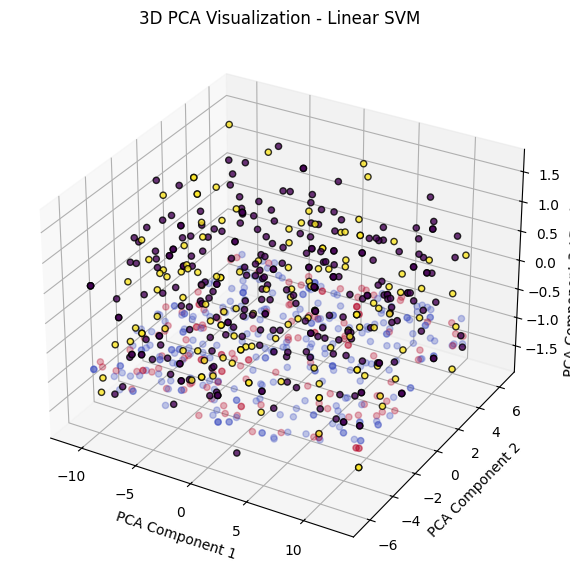

Polynomial Kernel Test Accuracy: 0.6675


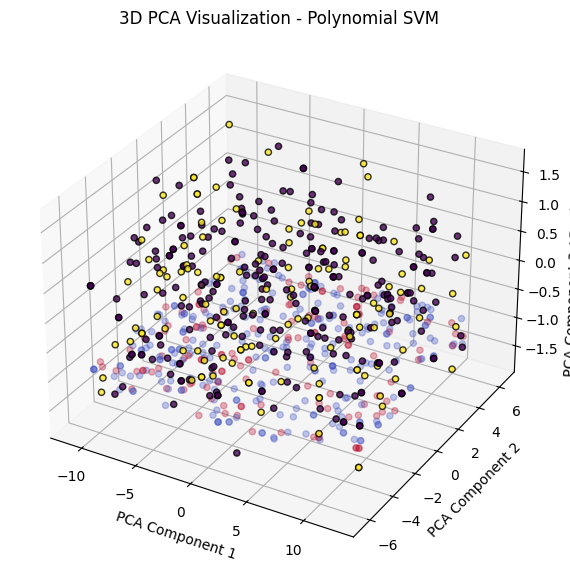

RBF Kernel Test Accuracy: 0.7125


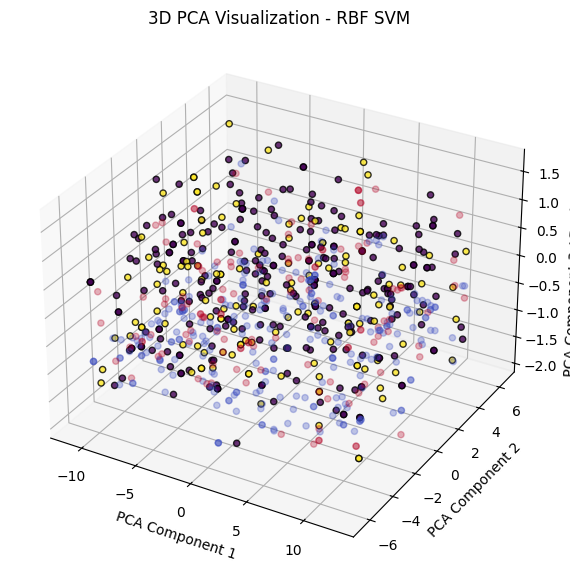

In [26]:
# Function to Plot 3D Scatter
def plot_3d_svm_decision(model, X, y, title):
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection="3d")

    # Scatter plot
    scatter = ax.scatter(
        X[:, 0], X[:, 1], X[:, 2],
        c=y, cmap="viridis", edgecolor="k", alpha=0.8
    )

    # Decision score values
    decision_vals = model.decision_function(X)

    # If multiclass, take max score for visualization
    if decision_vals.ndim > 1:
        decision_vals = decision_vals.max(axis=1)

    # Plot decision function values as "height" projection
    ax.scatter(
        X[:, 0], X[:, 1], decision_vals,
        c=y, cmap="coolwarm", alpha=0.3
    )

    ax.set_xlabel("PCA Component 1")
    ax.set_ylabel("PCA Component 2")
    ax.set_zlabel("PCA Component 3 / Decision Score")
    ax.set_title(title)

    plt.show()

#inear Kernel SVM
svm_linear = SVC(kernel="linear", C=1)
svm_linear.fit(X_train3, y_train3)

y_pred_linear = svm_linear.predict(X_test3)
print("Linear Kernel Test Accuracy:", accuracy_score(y_test3, y_pred_linear))

plot_3d_svm_decision(svm_linear, X_test3, y_test3, "3D PCA Visualization - Linear SVM")


#Polynomial Kernel SVM
svm_poly = SVC(kernel="poly", degree=3, C=1)
svm_poly.fit(X_train3, y_train3)

y_pred_poly = svm_poly.predict(X_test3)
print("Polynomial Kernel Test Accuracy:", accuracy_score(y_test3, y_pred_poly))

plot_3d_svm_decision(svm_poly, X_test3, y_test3, "3D PCA Visualization - Polynomial SVM")


# RBF Kernel SVM
svm_rbf = SVC(kernel="rbf", gamma=0.5, C=1)
svm_rbf.fit(X_train3, y_train3)

y_pred_rbf = svm_rbf.predict(X_test3)
print("RBF Kernel Test Accuracy:", accuracy_score(y_test3, y_pred_rbf))

plot_3d_svm_decision(svm_rbf, X_test3, y_test3, "3D PCA Visualization - RBF SVM")

## Hyperparameter Tuning

In [31]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Define pipeline
pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("svc", SVC(probability=False, random_state=42))
])

param_dist = {
    "svc__C": loguniform(1e-3, 1e3),
    "svc__gamma": loguniform(1e-4, 1e1),
    "svc__kernel": ["rbf"]
}

rand = RandomizedSearchCV(
    pipe,
    param_dist,
    n_iter=20,
    cv=3,
    scoring="accuracy",
    n_jobs=-1,
    random_state=42,
    verbose=2
)

rand.fit(X_selected, y_encoded)

print(rand.best_score_, rand.best_params_)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
0.8290014152083117 {'svc__C': np.float64(622.0025976819159), 'svc__gamma': np.float64(1.1015056790269626), 'svc__kernel': 'rbf'}


In [32]:
best_model = Pipeline([
    ("scaler", StandardScaler()),
    ("svc", SVC(
        kernel="rbf",
        C=622.0025976819159,
        gamma=1.1015056790269626,
        probability=True
    ))
])

best_model.fit(X_train, y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('scaler', ...), ('svc', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"copy copy: bool, default=TrueIf False, try to avoid a copy and do inplace scaling instead.This is not guaranteed to always work inplace; e.g. if the data isnot a NumPy array or scipy.sparse CSR matrix, a copy may still bereturned.",True
,"with_mean with_mean: bool, default=TrueIf True, center the data before scaling.This does not work (and will raise an exception) when attempted onsparse matrices, because centering them entails building a densematrix which in common use cases is likely to be too large to fit inmemory.",True
,"with_std with_std: bool, default=TrueIf True, scale the data to unit variance (or equivalently,unit standard deviation).",True
,"C C: float, default=1.0Regularization parameter. The strength of the regularization isinversely proportional to C. Must be strictly positive. The penaltyis a squared l2 penalty. For an intuitive visualization of the effectsof scaling the regularization parameter C, see:ref:`sphx_glr_auto_examples_svm_plot_svm_scale_c.py`.",622.0025976819159
,"kernel kernel: {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} or callable, default='rbf'Specifies the kernel type to be used in the algorithm. Ifnone is given, 'rbf' will be used. If a callable is given it is used topre-compute the kernel matrix from data matrices; that matrix should bean array of shape ``(n_samples, n_samples)``. For an intuitivevisualization of different kernel types see:ref:`sphx_glr_auto_examples_svm_plot_svm_kernels.py`.",'rbf'
,"degree degree: int, default=3Degree of the polynomial kernel function ('poly').Must be non-negative. Ignored by all other kernels.",3
,"gamma gamma: {'scale', 'auto'} or float, default='scale'Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.- if ``gamma='scale'`` (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,- if 'auto', uses 1 / n_features- if float, must be non-negative... versionchanged:: 0.22 The default value of ``gamma`` changed from 'auto' to 'scale'.",1.1015056790269626


In [33]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:,1]

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.97      0.89       267
           1       0.91      0.55      0.69       133

    accuracy                           0.83       400
   macro avg       0.86      0.76      0.79       400
weighted avg       0.85      0.83      0.82       400

Confusion Matrix:
 [[260   7]
 [ 60  73]]
ROC-AUC: 0.8850778631973192


In [35]:
print("Train Accuracy:", best_model.score(X_train, y_train))
print("Test Accuracy :", best_model.score(X_test, y_test))

Train Accuracy: 0.936875
Test Accuracy : 0.8325
[CV] END svc__C=24.658329458549105, svc__gamma=0.09846738873614563, svc__kernel=rbf; total time=   0.1s
[CV] END svc__C=0.0013289448722869186, svc__gamma=7.072114131472227, svc__kernel=rbf; total time=   0.0s
[CV] END svc__C=98.77700294007911, svc__gamma=0.0011526449540315614, svc__kernel=rbf; total time=   0.1s
[CV] END svc__C=0.05660670699258887, svc__gamma=0.0067890532716984855, svc__kernel=rbf; total time=   0.1s
[CV] END svc__C=0.01577766363058246, svc__gamma=0.03725393839578886, svc__kernel=rbf; total time=   0.1s
[CV] END svc__C=622.0025976819159, svc__gamma=1.1015056790269626, svc__kernel=rbf; total time=   0.0s
[CV] END svc__C=0.008632008168602538, svc__gamma=0.000602521573620386, svc__kernel=rbf; total time=   0.1s
[CV] END svc__C=0.012329623163659839, svc__gamma=0.0008260808399079611, svc__kernel=rbf; total time=   0.0s
[CV] END svc__C=0.3905441275210791, svc__gamma=0.0028585493941961923, svc__kernel=rbf; total time=   0.1s
[CV

# Report